## Preparing the data

In [1]:
import pandas as pd

In [2]:
# Uploading train data
data_raw = pd.read_csv("train.csv")
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Download and setup sweetviz
!pip install sweetviz -qq
!echo '[Layout]' > Override.ini
!echo 'show_logo = 0' >> Override.ini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report Basic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



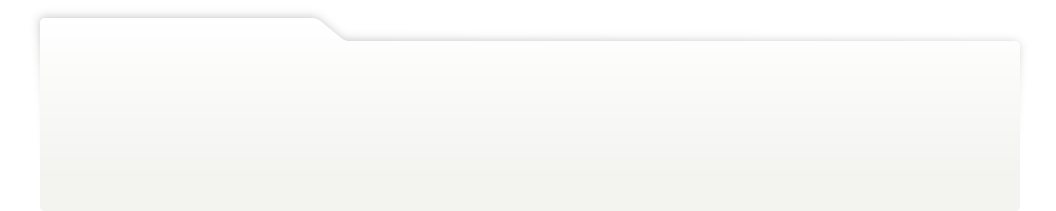
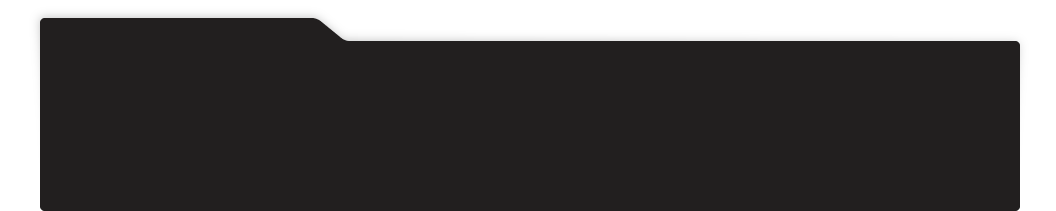
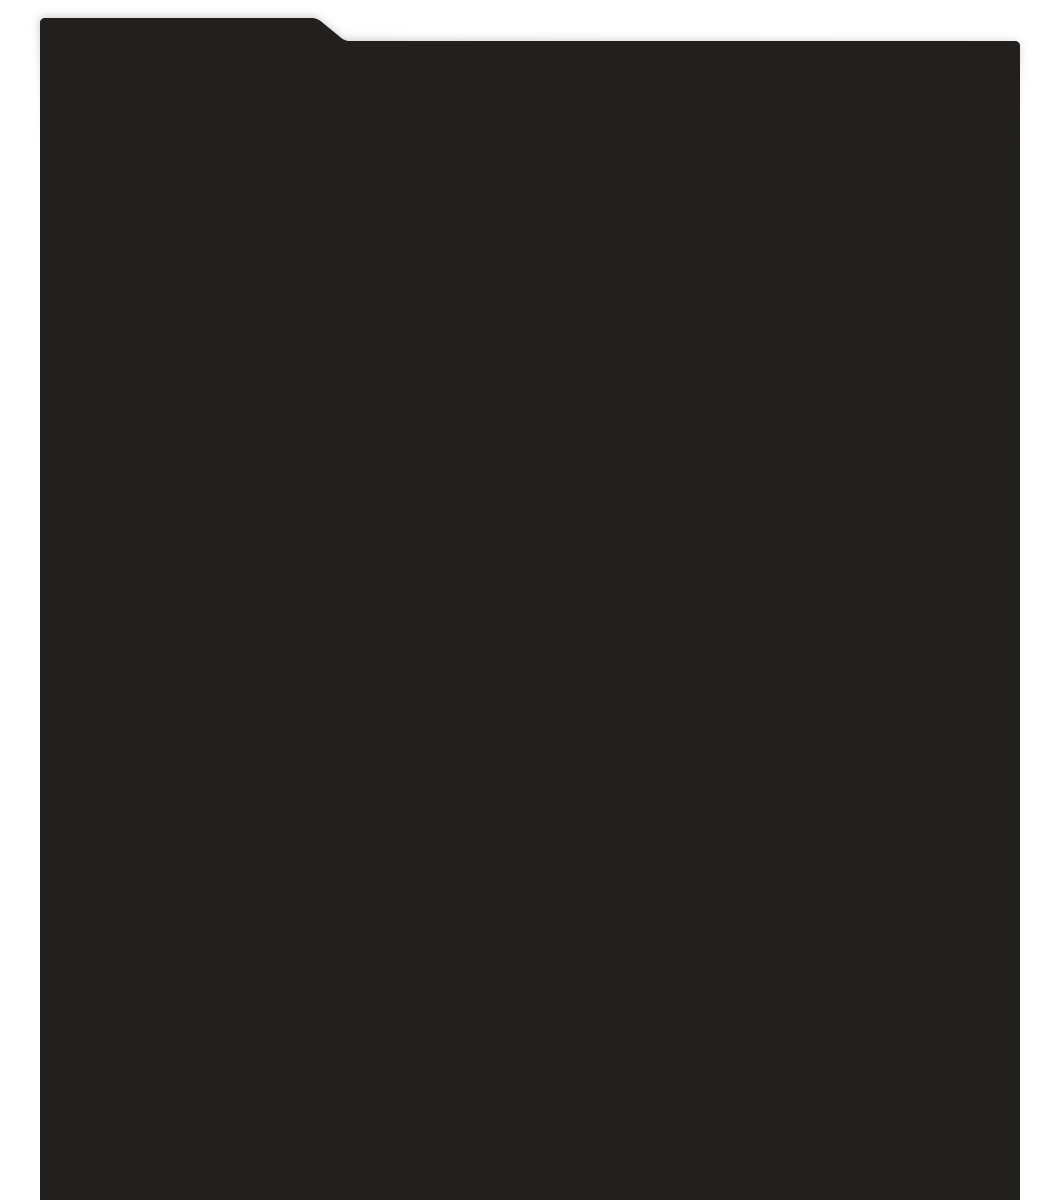
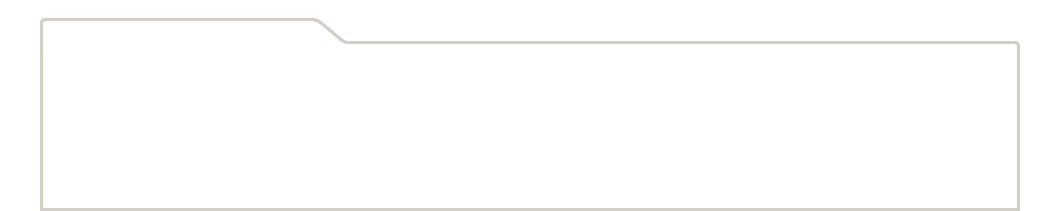
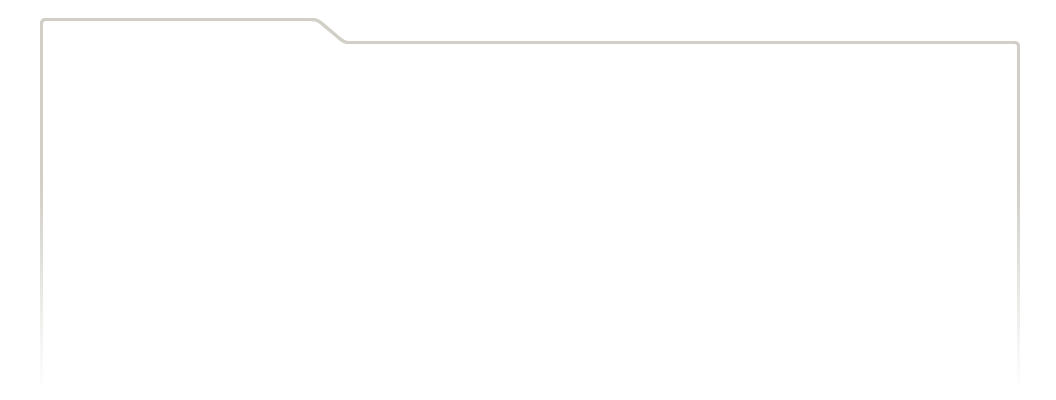
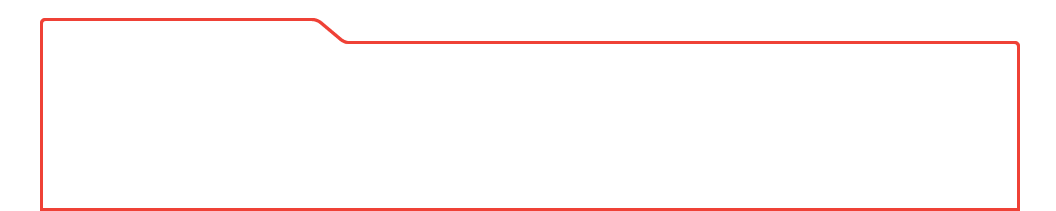
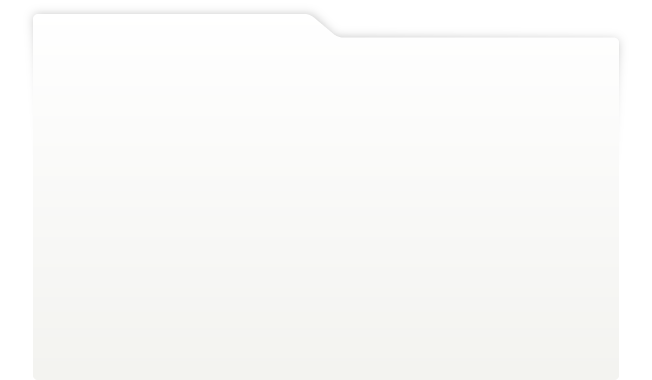
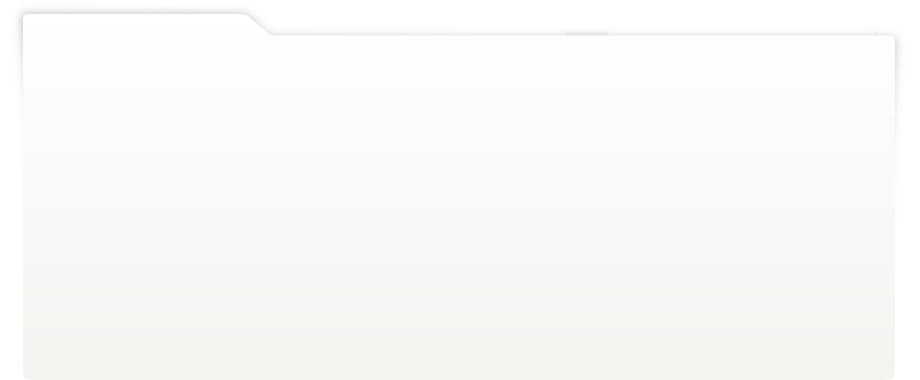
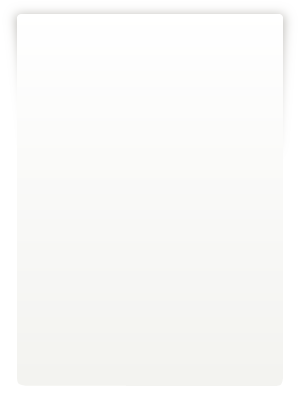
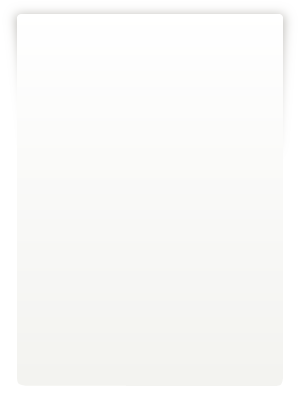
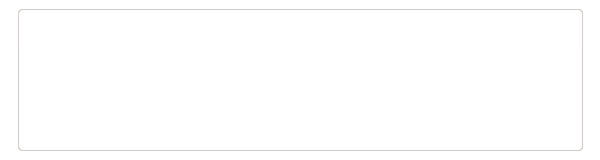
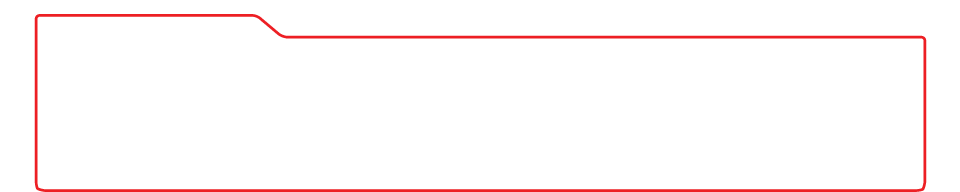
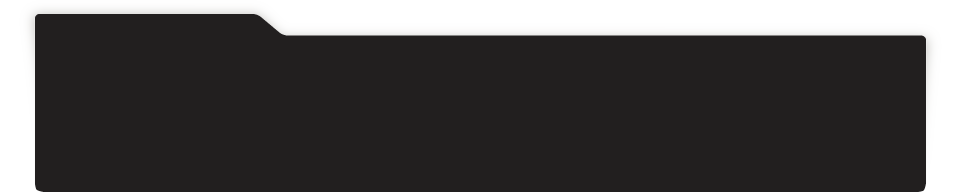
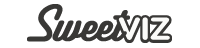
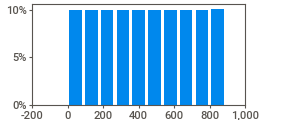
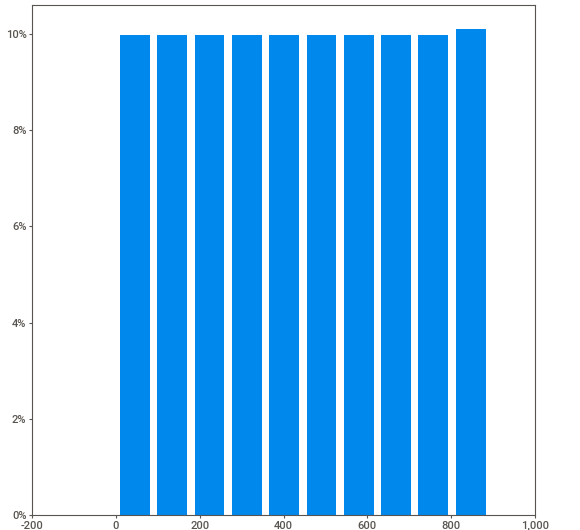
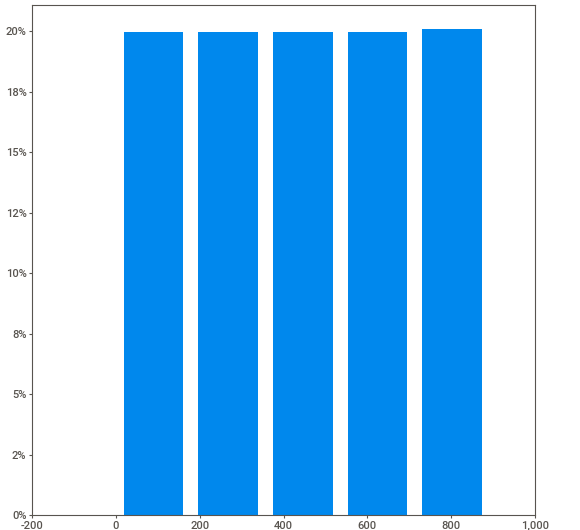
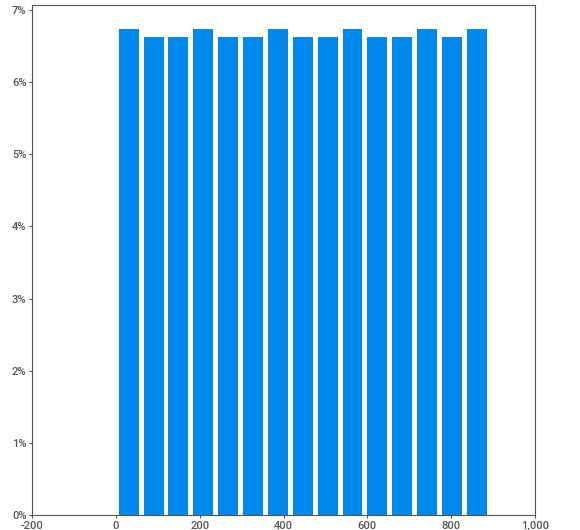
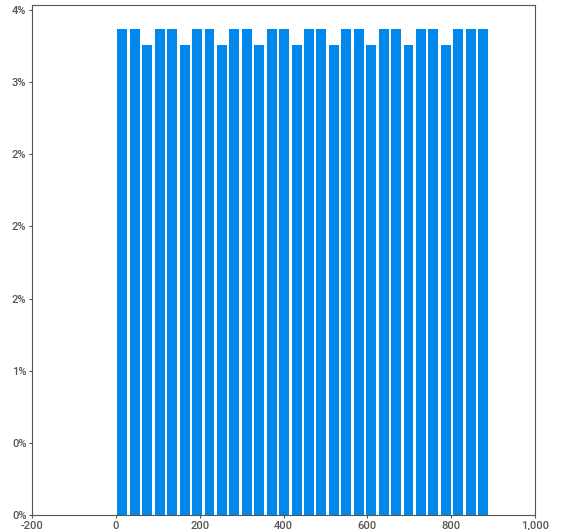
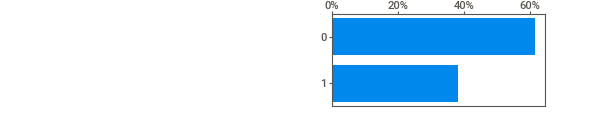
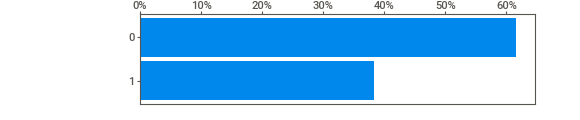
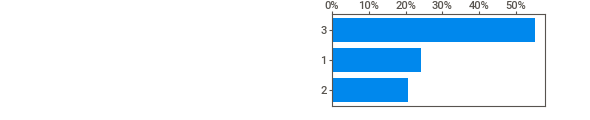
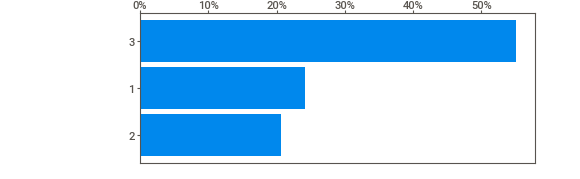
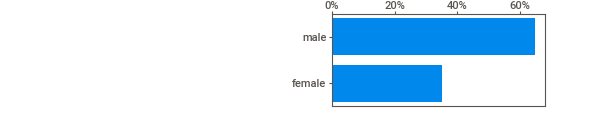
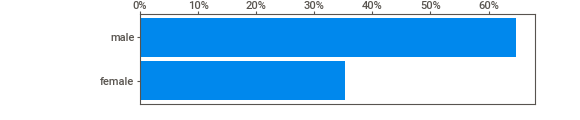
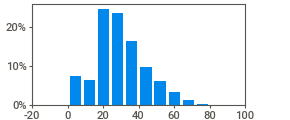
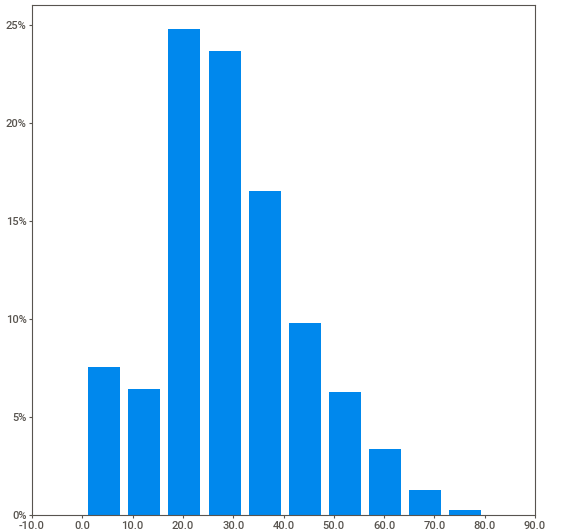
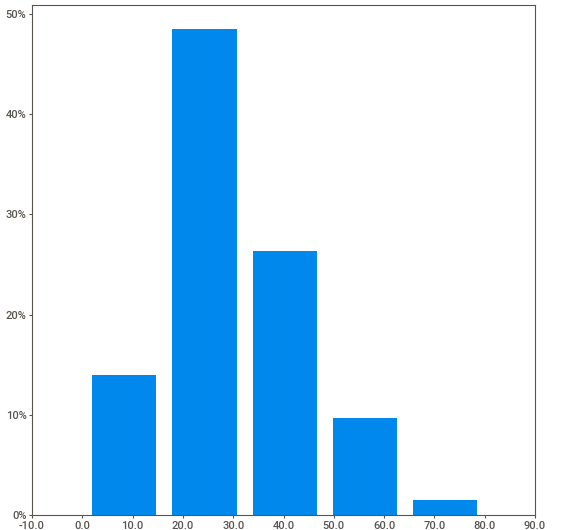
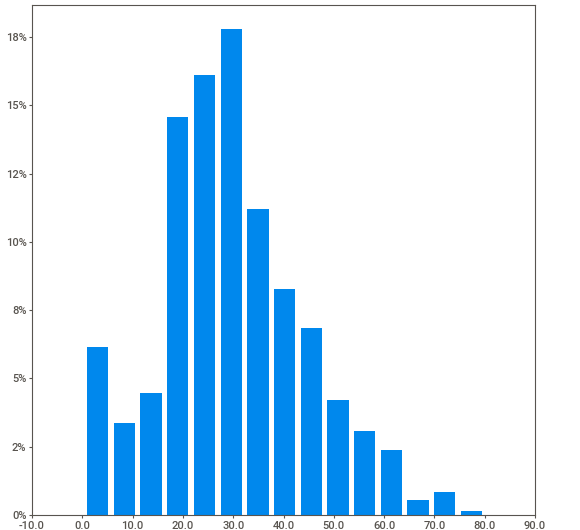
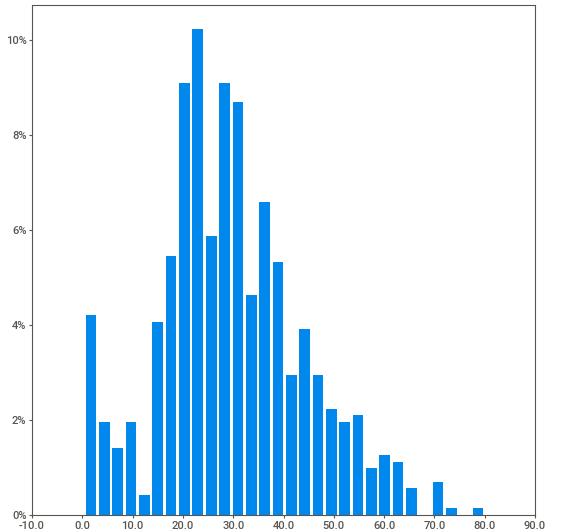
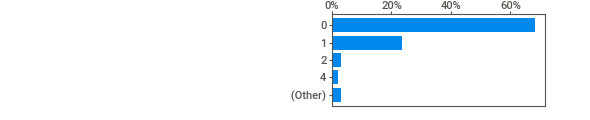
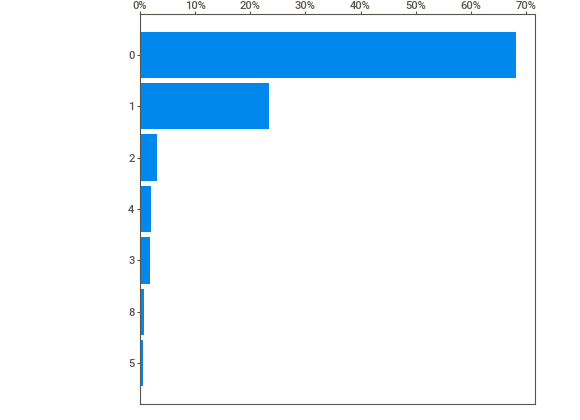
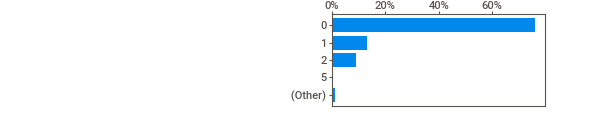
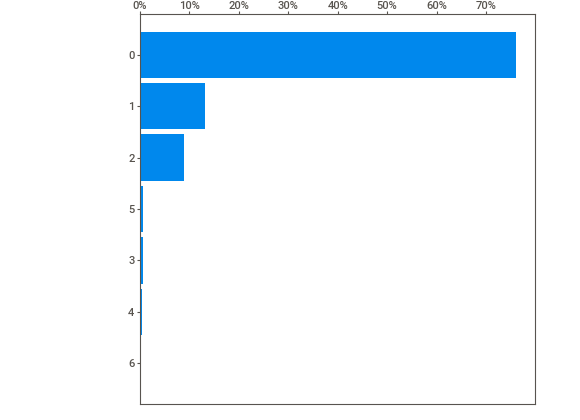
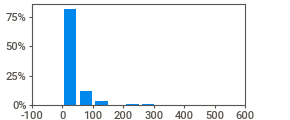
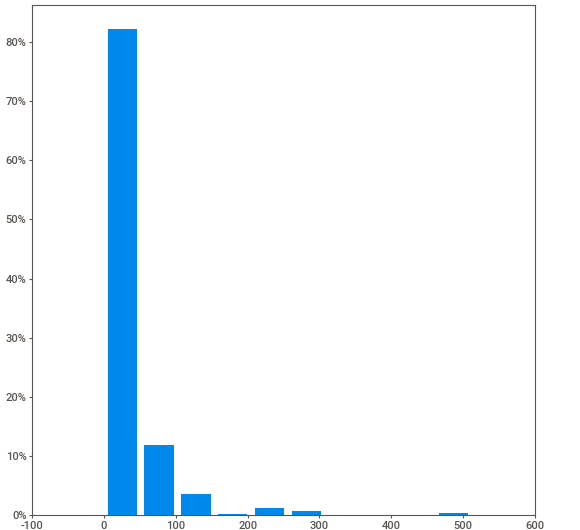
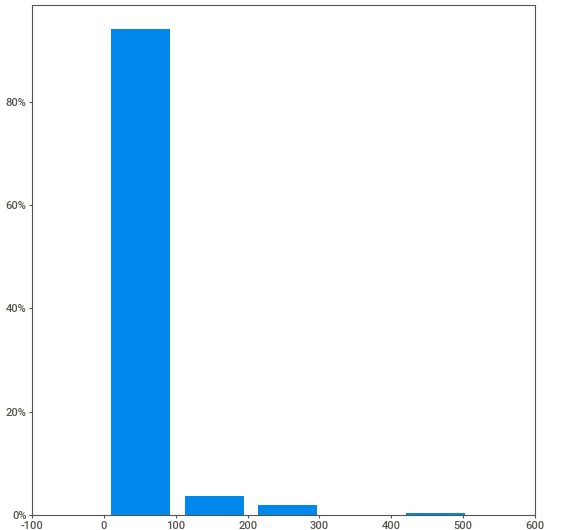
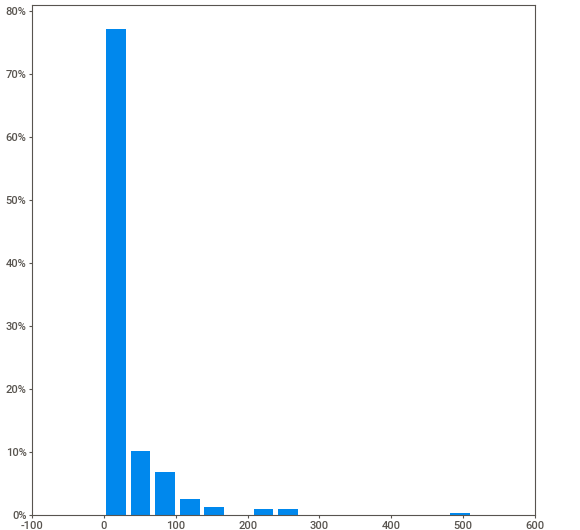
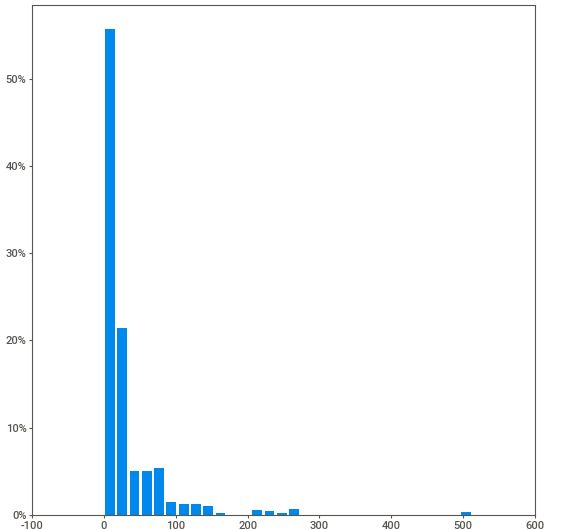
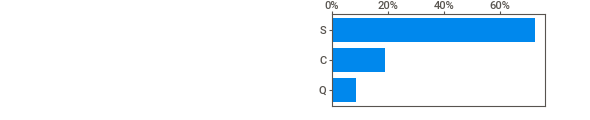
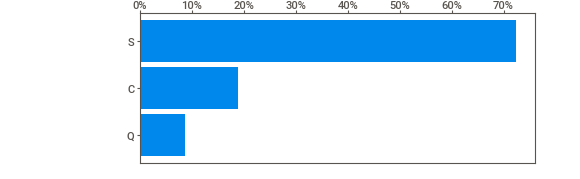
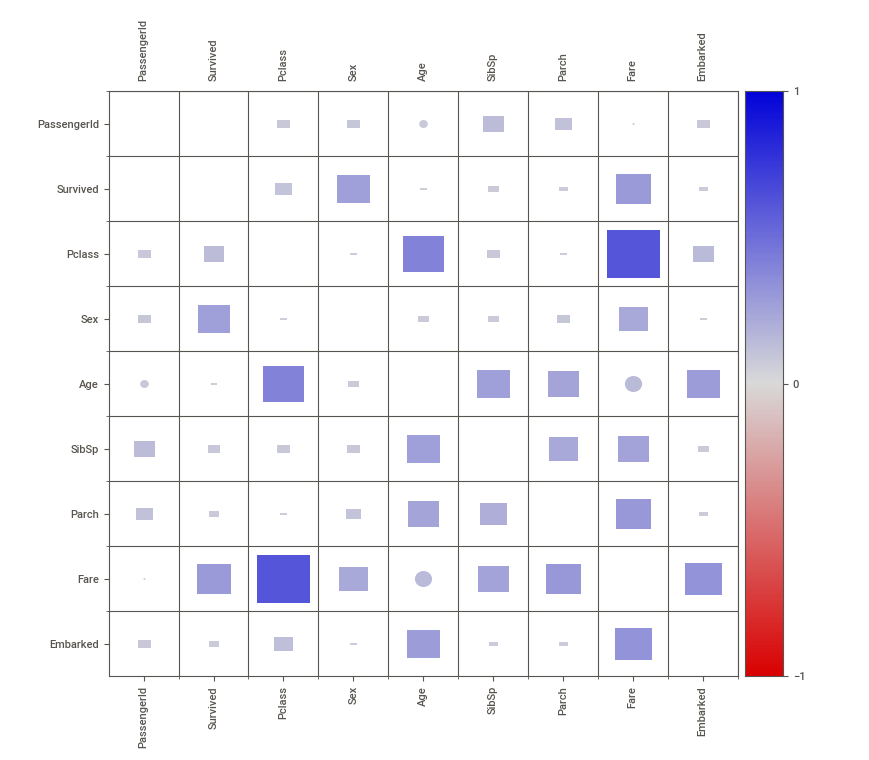
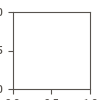

In [4]:
# Create basic data report
import sweetviz as sv
sv.config_parser.read("Override.ini")
my_report = sv.analyze(data_raw)
my_report.show_html(filepath='Basic_report.html', layout='vertical', scale=None)
my_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

Report Compare_report_male_female.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



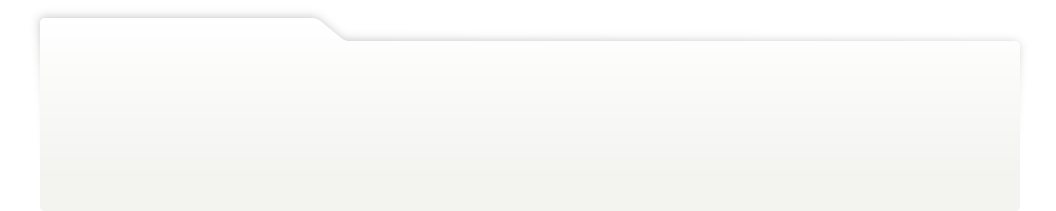
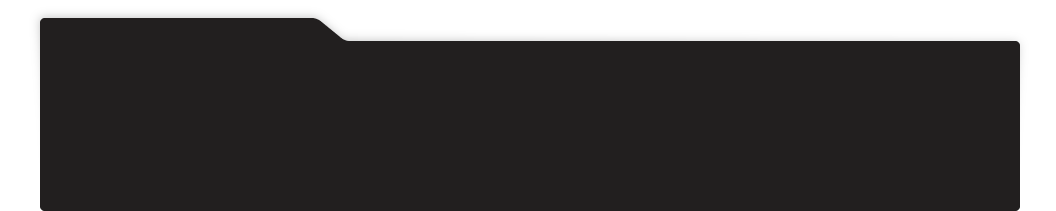
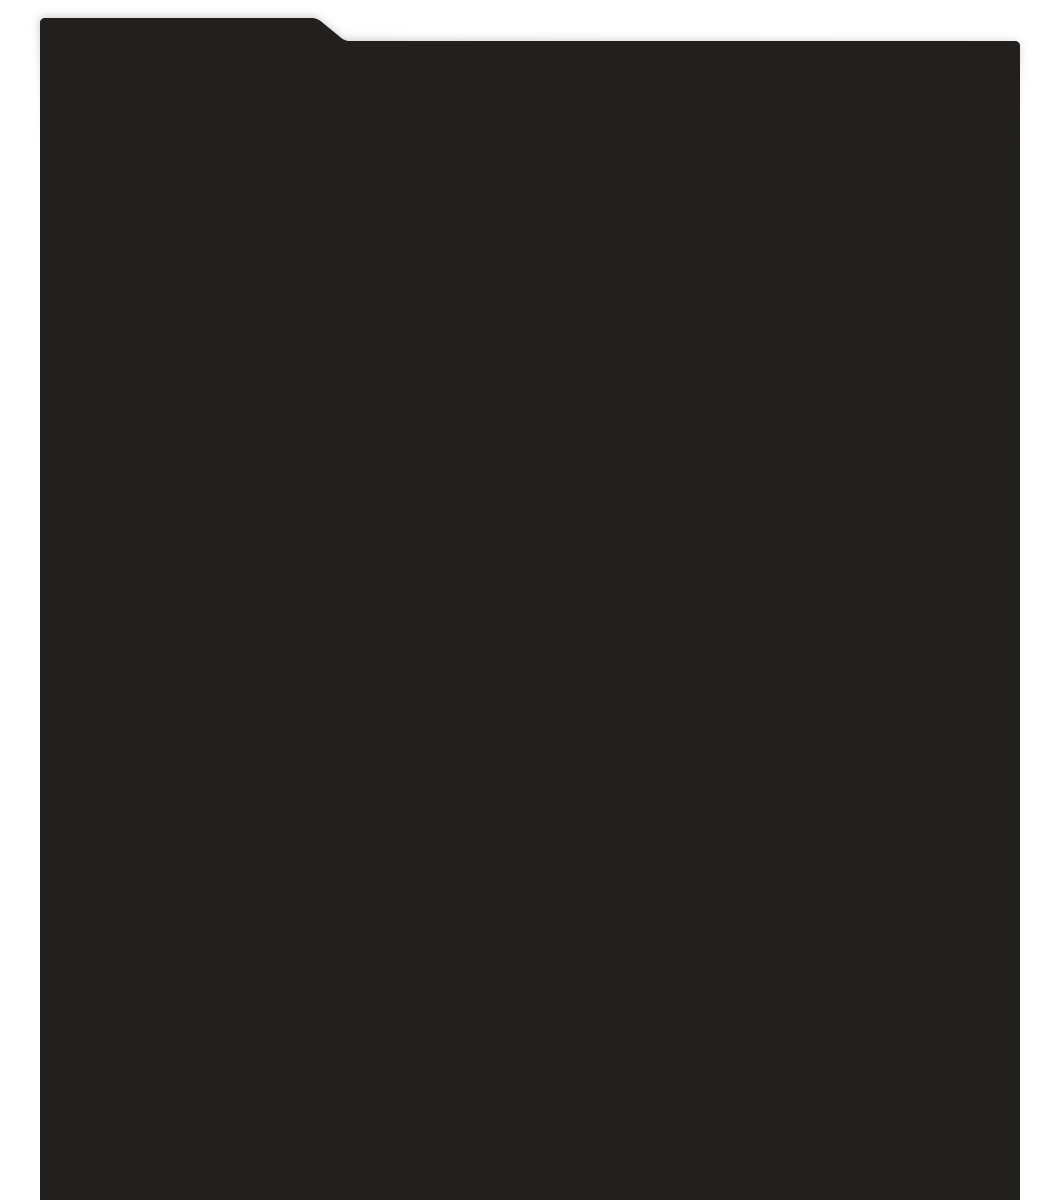
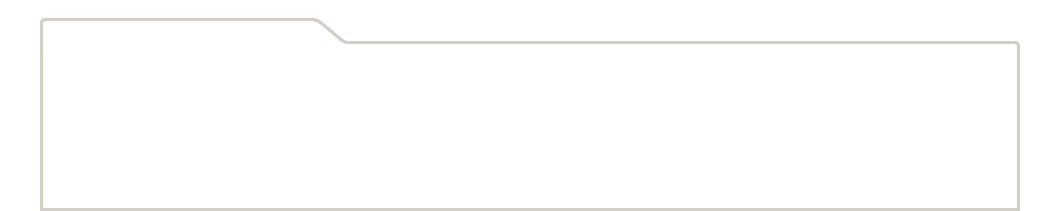
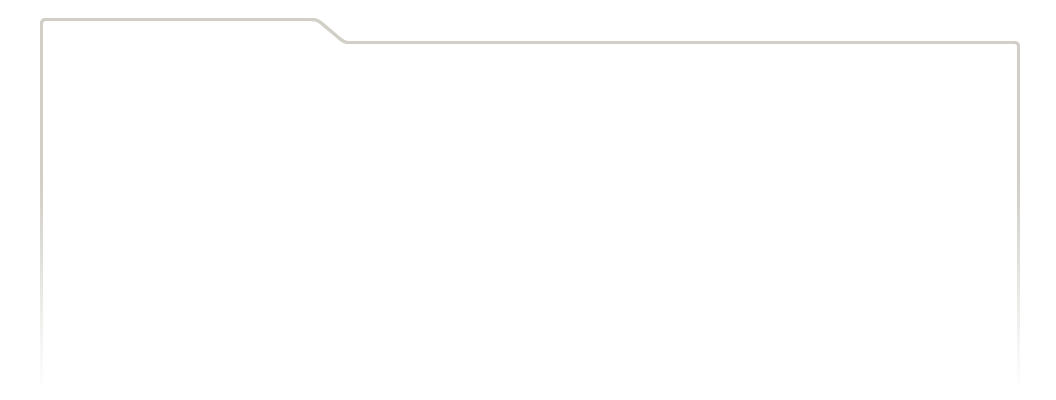
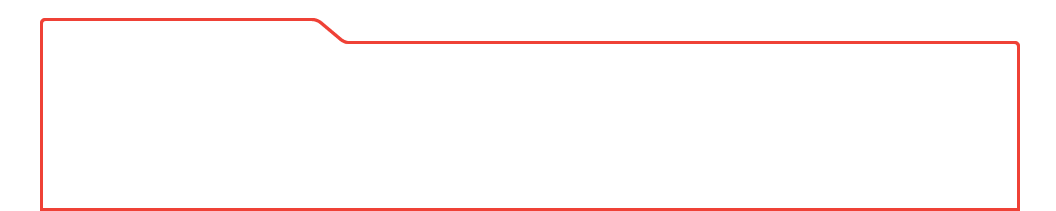
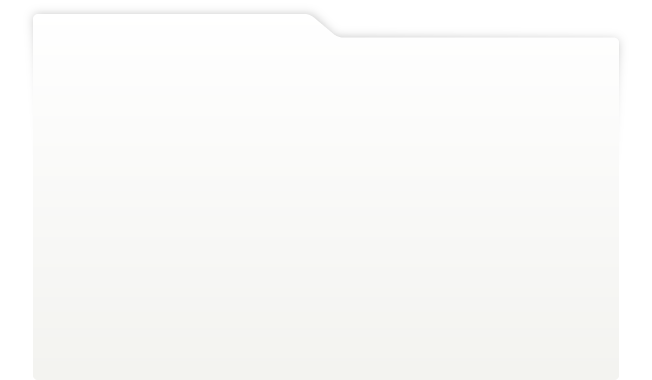
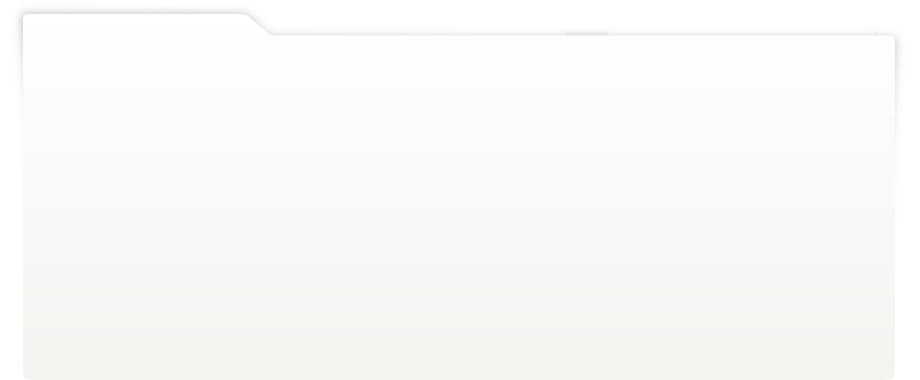
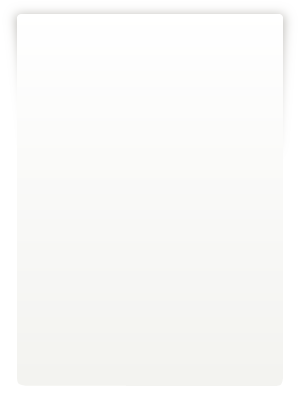
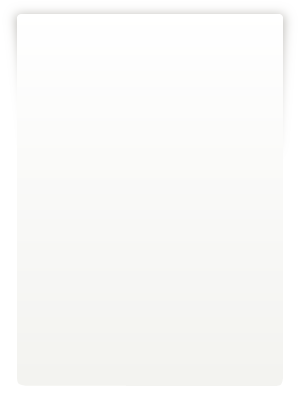
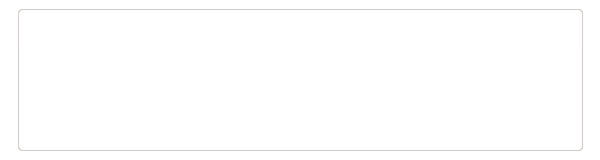
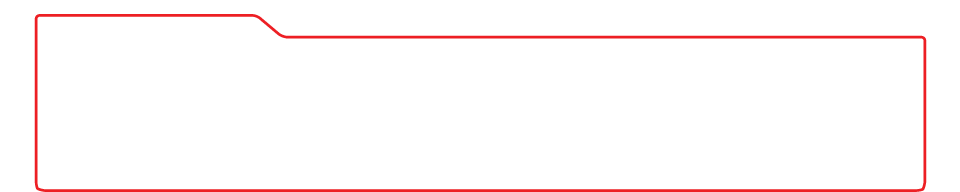
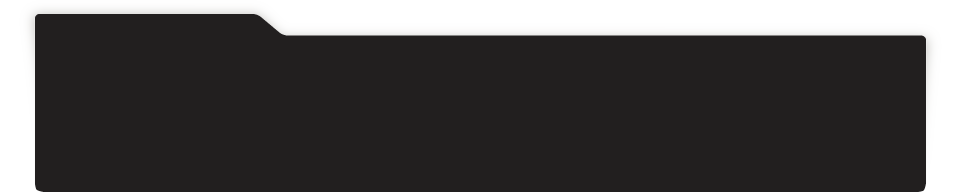
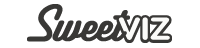
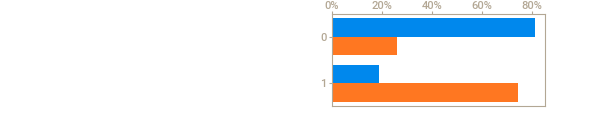
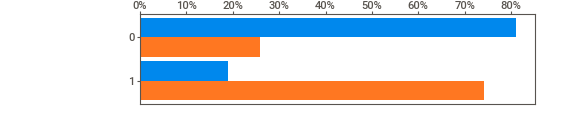
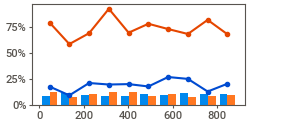
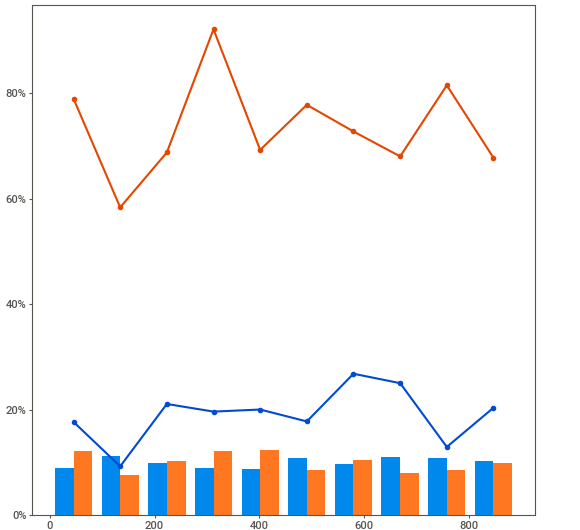
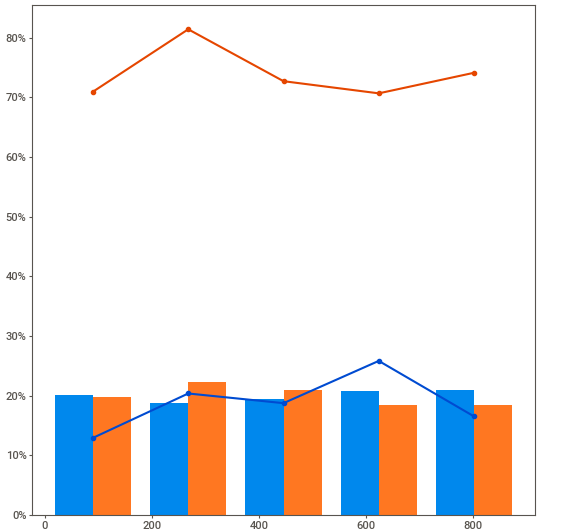
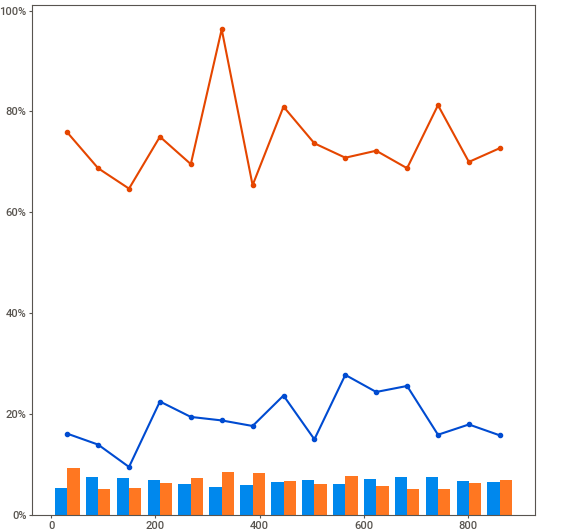
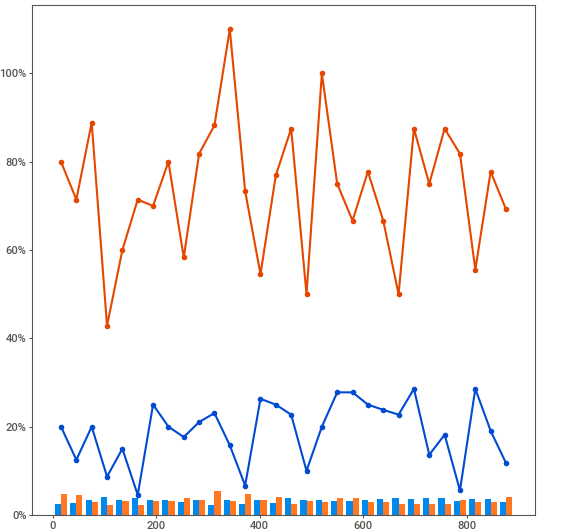
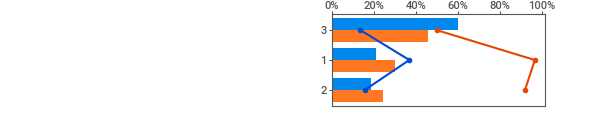
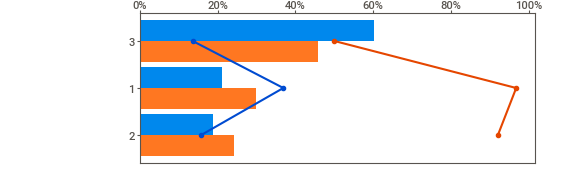
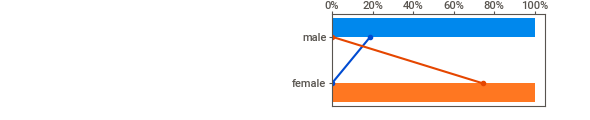
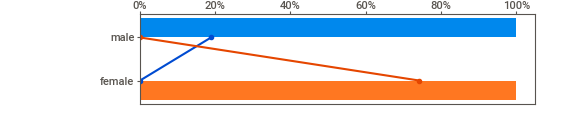
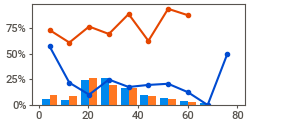
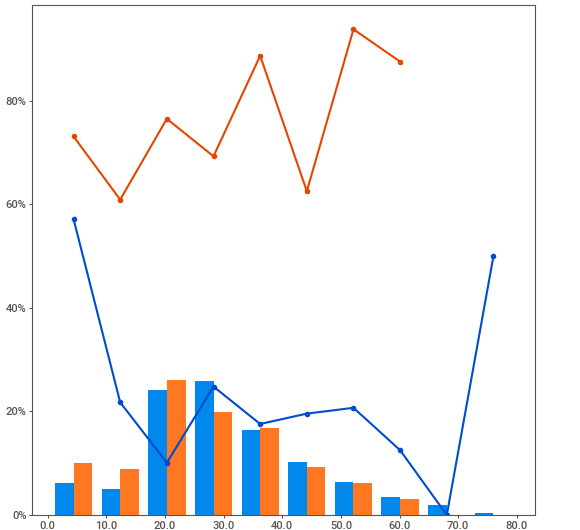
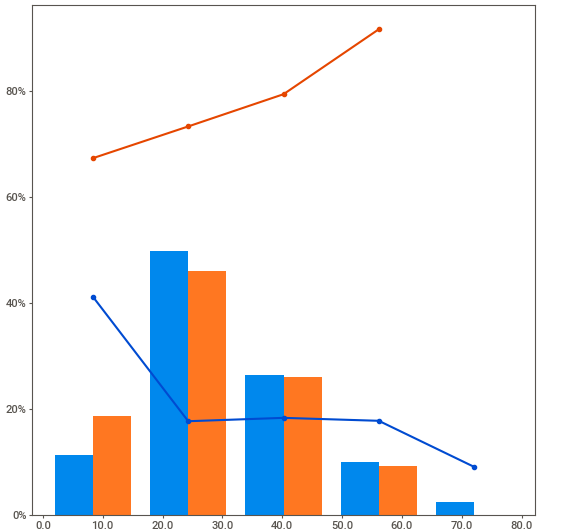
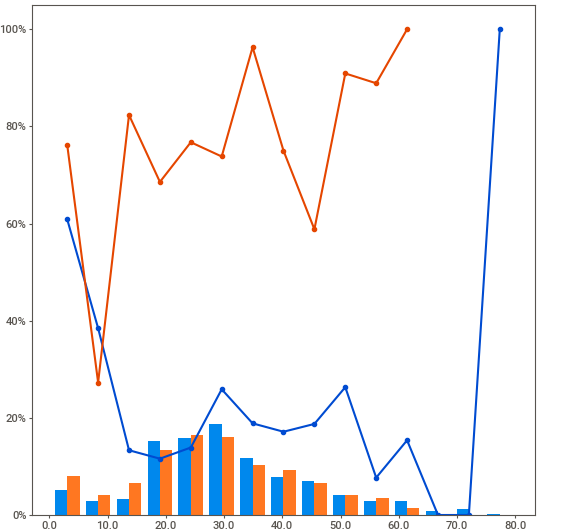
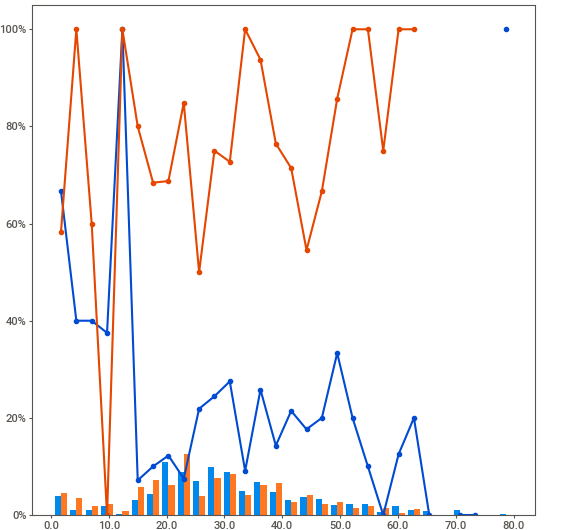
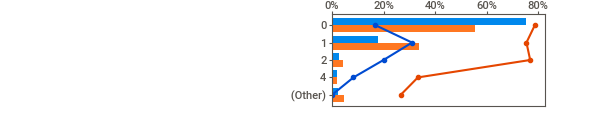
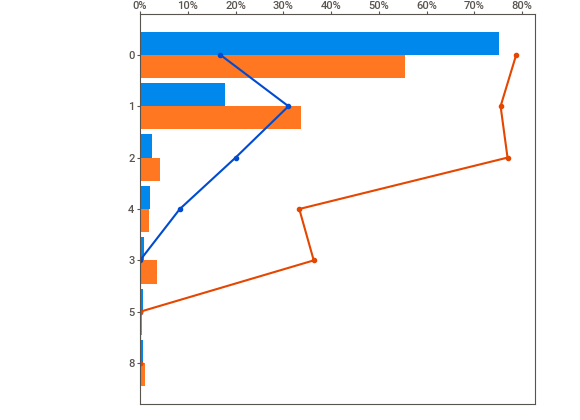
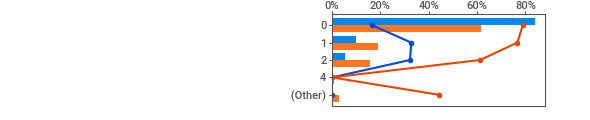
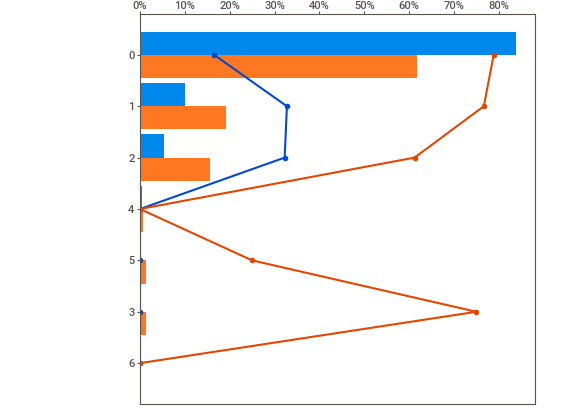
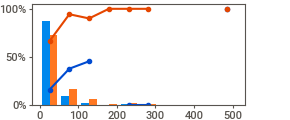
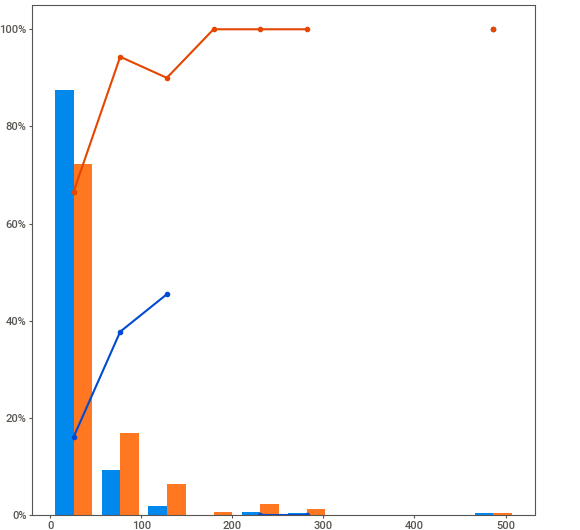
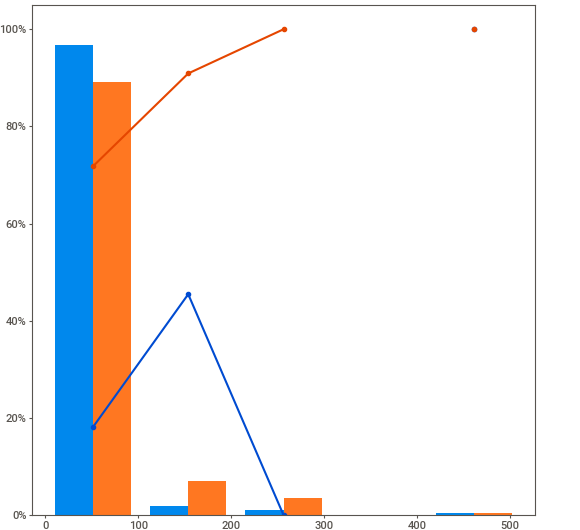
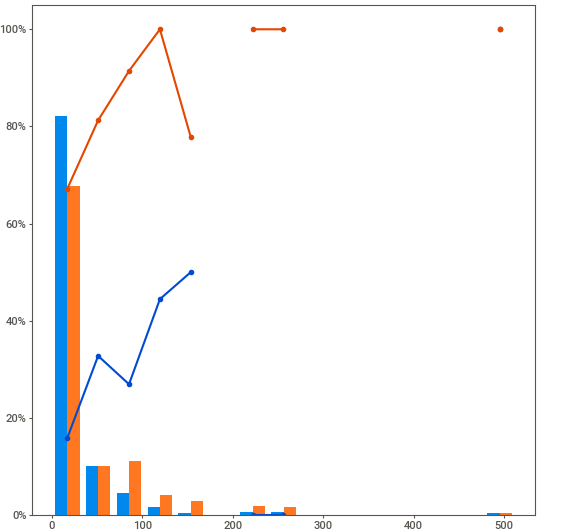
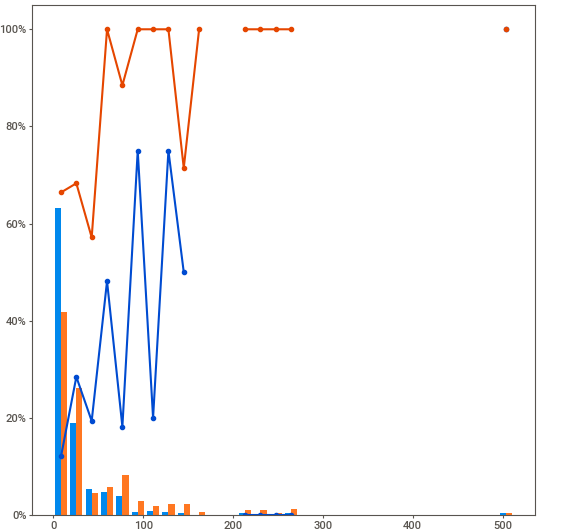
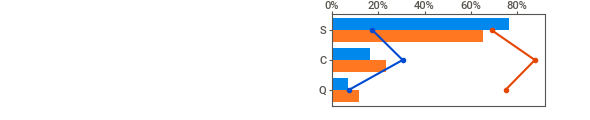
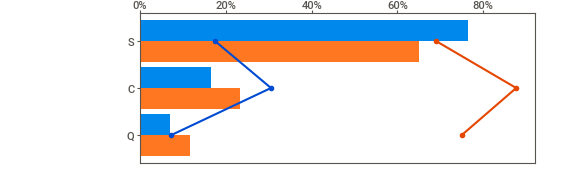
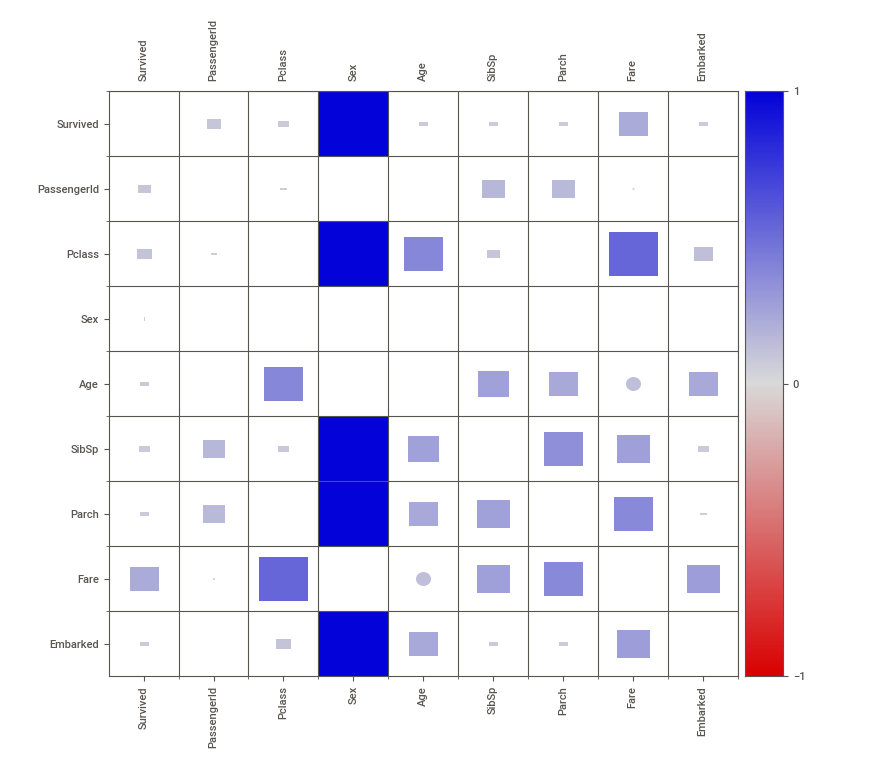
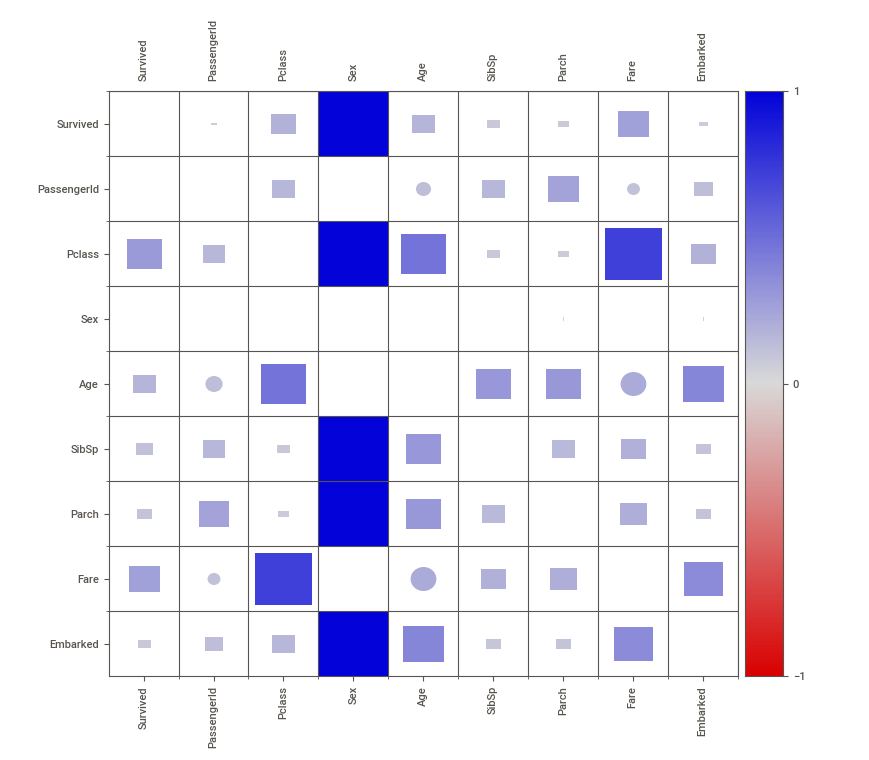

In [5]:
# Report comparing male/female by survived
intra_report = sv.compare_intra(data_raw, data_raw["Sex"] == 'male', ["Male", "Female"], 'Survived')
intra_report.show_html(filepath='Compare_report_male_female.html', layout='vertical', scale=None)
intra_report.show_notebook()

In [6]:
# Deleting unimportant columns
data_ed = data_raw.copy()
data_ed.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [7]:
# Filling nulls in Embarked (mode) and Age (median)
data_ed['Embarked'] = data_ed['Embarked'].fillna('S')
data_ed['Age'] = data_ed['Age'].fillna(28)
data_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
data_ed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# One Hot Encoding for Age and Embarked
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse = False)
encoded_data = encoder.fit_transform(data_ed.loc[:,['Sex', 'Embarked']])
encoded_data_pandas = pd.DataFrame(encoded_data,
                                   columns = encoder.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
encoded_data_pandas

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [11]:
data_ed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data = pd.concat([data_ed, encoded_data_pandas], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0


## Decision Tree

In [13]:
# Splitting train/test data
from sklearn.model_selection import train_test_split

data_prep = data.copy().drop(['Sex', 'Embarked'], axis=1)
X = data_prep.drop(columns = 'Survived')
y = data_prep['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

668 223 668 223


In [19]:
# Building decision tree on all parameters
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini',
                              max_depth = 4,
                              min_samples_leaf = 20,
                              random_state = 20)

tree.fit(X_train[['Age', 'Fare']], y_train)
predictions = tree.predict(X_test[['Age', 'Fare']])

In [20]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       141
           1       0.64      0.34      0.44        82

    accuracy                           0.69       223
   macro avg       0.67      0.61      0.61       223
weighted avg       0.68      0.69      0.66       223



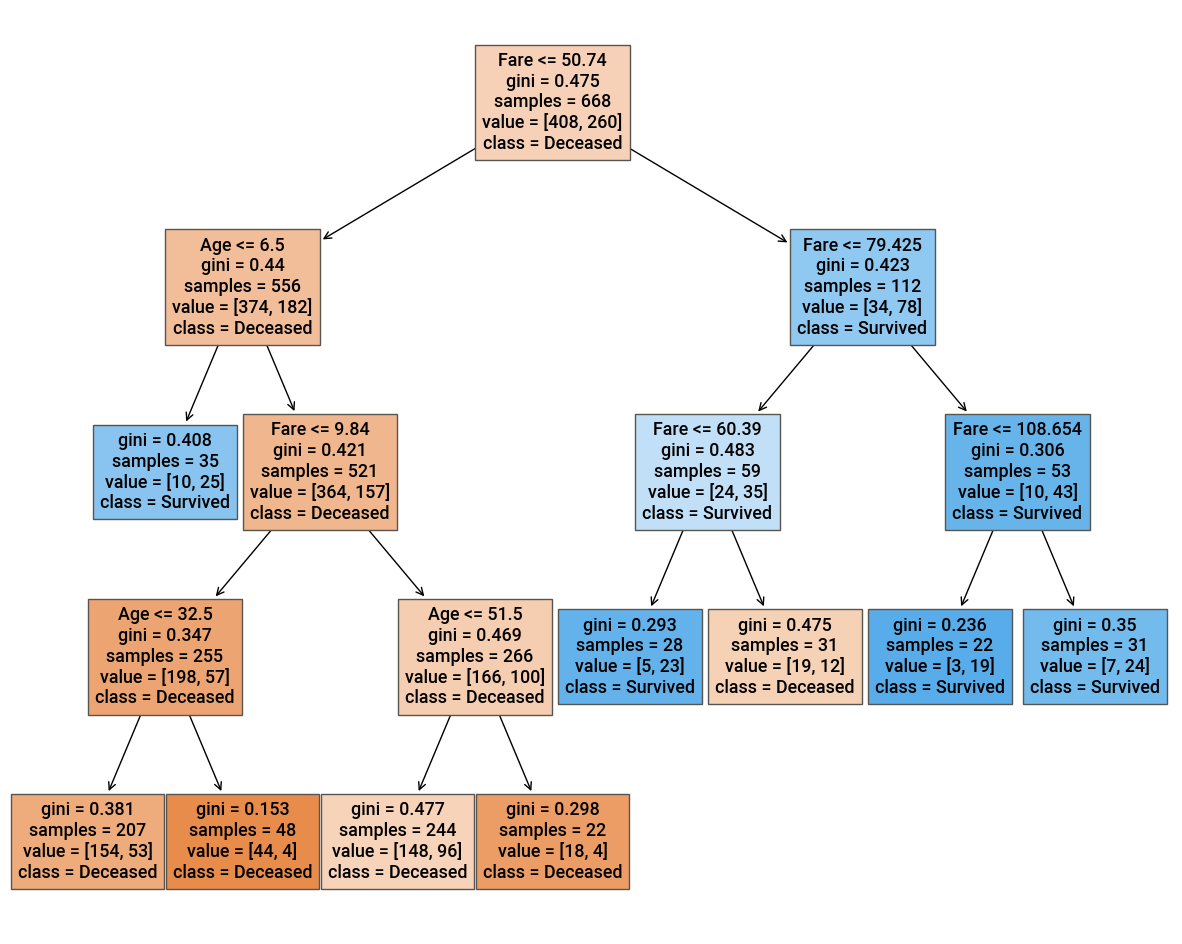

In [16]:
# Plot the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.subplots(figsize = (15,12))
plot_tree(tree, impurity =True,
          feature_names = tree.feature_names_in_,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()

## Pipelines

In [17]:
data_ed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = data_ed.drop(columns='Survived')
y = data_ed['Survived']
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X, y, test_size = 0.25)

# Define the numerical and categorical features
num_features = ['Age', 'Fare', 'SibSp'] # ['Parch']
cat_features = ['Pclass', 'Sex'] # ['Embarked']

# Define the preprocessing steps for numerical and categorical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine the numerical and categorical transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Combine the preprocessing steps and the classifier into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Fit and transform the training data
X_train_preprocessed = pipeline.fit(X_trainP, y_trainP)

In [26]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex'])]))])

In [27]:
from sklearn.model_selection import GridSearchCV

# Combine the preprocessing steps and the classifier into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define the hyperparameter space for grid search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [5, 10, 20, 25],
    'classifier__min_samples_leaf': [5, 10, 15, 20]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_trainP, y_trainP)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 20}
Best score:  0.7949500617214679


In [28]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                                        min_samples_split=20))])

In [29]:
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_predP = best_estimator.predict(X_testP)
print(classification_report(y_testP, y_predP))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       144
           1       0.78      0.78      0.78        79

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

par_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    #'classifier__min_samples_split': range(1,21,1),
    'classifier__min_samples_leaf': range(0,21,5),
    'classifier__max_features': range(3,5,1),
    'classifier__max_depth': range(1,31,5)
}

search = GridSearchCV(pipe, param_grid=par_grid, n_jobs=16)
search.fit(X_trainP, y_trainP)

search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-pac

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 16,
 'classifier__max_features': 4,
 'classifier__min_samples_leaf': 5}

In [44]:
best = search.best_estimator_

y_predPr = best.predict(X_testP)
print(classification_report(y_test, y_predPr))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       141
           1       0.40      0.38      0.39        82

    accuracy                           0.57       223
   macro avg       0.53      0.53      0.53       223
weighted avg       0.56      0.57      0.56       223



## Kaggle

In [ ]:
# Getting test data
data_test = pd.read_csv('test.csv')
data_test.head()

In [ ]:
# Making predictions for test data
y_pred_test = best_estimator.predict(data_test)
print(y_pred_test)

In [ ]:
# Model preparation for Kaggle
data_submit = pd.concat([data_test['PassengerId'], pd.DataFrame(y_pred_test, columns = ['Survived'])], axis = 1)
print(data_submit)
data_submit.to_csv('submit.csv', index = False)

**Score: 0.76315**